**Column Details**:

**ID** : Customer's Unique Identifier

**Year_Birth**: Customer's Birth Year

**Education**: Customer's education level

**Marital_Status**: Customer's marital status

**Income**: Customer's yearly household income

**Kidhome**: Number of children in customer's household

**Teenhome**: Number of teenagers in customer's household

**Dt_Customer**: Date of customer's enrollment with the company

**Recency**: Number of days since customer's last purchase

**MntWines**: Amount spent on wine in the last 2 years

**MntFruits**: Amount spent on fruits in the last 2 years

**MntMeatProducts**: Amount spent on meat in the last 2 years

**MntFishProducts**: Amount spent on fish in the last 2 years

**MntSweetProducts**: Amount spent on sweets in the last 2 years

**MntGoldProds**: Amount spent on gold in the last 2 years

**NumDealsPurchases**: Number of purchases made with a discount

**NumWebPurchases**: Number of purchases made through the company's web site

**NumCatalogPurchases**: Number of purchases made using a catalogue

**NumStorePurchases**: Number of purchases made directly in stores

**NumWebVisitsMonth**: Number of visits to company's web site in the last month

**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)

**Complain**: 1 if customer complained in the last 2 years, 0 otherwise

**Country**: Customer's location

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import scipy.stats as stats

In [283]:
data = pd.read_csv('data/marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## 1. Getting familiar with the dataset and data cleaning

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [285]:
# We have 23 numerical variables and 5 categorical variables. We have missing values for the 'Income' variable

In [286]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


In [287]:
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [288]:
data['Income'] = data['Income'].str.strip('$').str.replace(',', '').str.replace('.', '').str.replace('00', '').astype(float)

In [289]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [290]:
data['Income'] = data['Income'].fillna(data['Income'].median())

In [291]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

## 2. Feature Engineering

In [292]:
# Creating several variables:

In [293]:
data['Age'] = date.today().year - data['Year_Birth']
data['Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Absurd':'Alone','Widow':'Alone','YOLO':'Alone', 'Married':'In couple','Together':'In couple'})
data['Has_children'] = np.where(data['Kidhome'] + data['Teenhome'] > 0, 'Yes', 'No')

In [294]:
df = data[['Age','Income','Spending','Marital_Status','Has_children','Education']]
df.head()

,Age,Income,Spending,Marital_Status,Has_children,Education
0,52,84835.0,1190,Alone,No,Graduation
1,61,57091.0,577,Alone,No,Graduation
2,64,67267.0,251,In couple,Yes,Graduation
3,55,32474.0,11,In couple,Yes,Graduation
4,33,21474.0,91,Alone,Yes,Graduation


In [295]:
round(df.describe(), 2)

,Age,Income,Spending
count,2240.00,2240.00,2240.00
mean,53.19,50675.40,605.80
std,11.98,26315.23,602.25
min,26.00,6.00,5.00
25%,45.00,34159.25,68.75
50%,52.00,50510.50,396.00
75%,63.00,67480.50,1045.50
max,129.00,666666.00,2525.00


In [296]:
# Looking at the results of the describe finction (mean vs median, max) we notice the posiible ouliers for 'Age', 
# 'Income' and 'Spending'

In [297]:
def graph(feature):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,4)
    sns.histplot(data=df, x=feature, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=feature, ax=ax[1])
    plt.show()

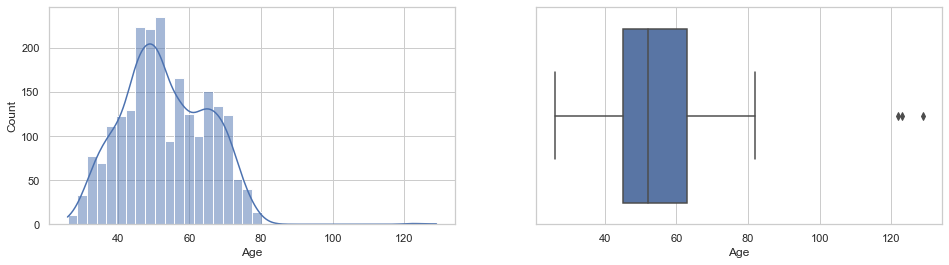

In [298]:
graph(df['Age'])

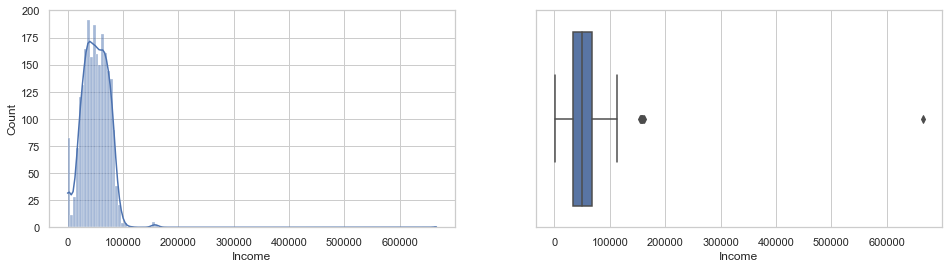

In [299]:
graph(df['Income'])

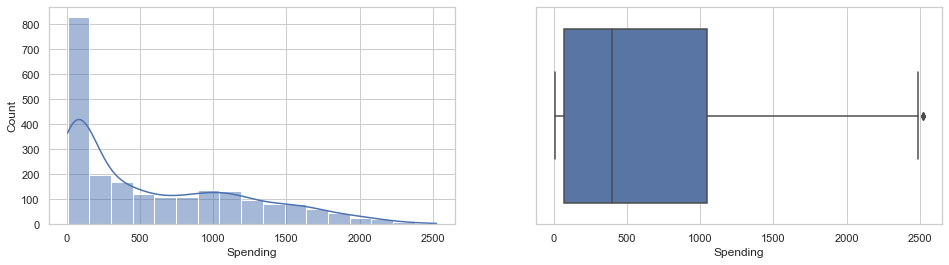

In [300]:
graph(df['Spending'])

### 3. Handling outliers

In [301]:
df = df[df['Age'] <100].reset_index(drop=True)
df = df[df['Income'] < 200000].reset_index(drop=True)

### 4. Exploratory Analysis

<AxesSubplot:>

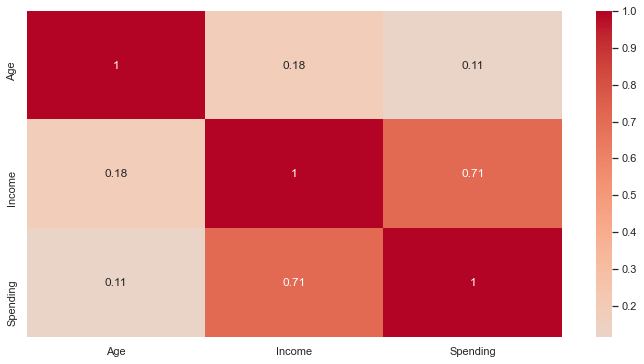

In [302]:
plt.rcParams["figure.figsize"] = (12,6)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center = 0)

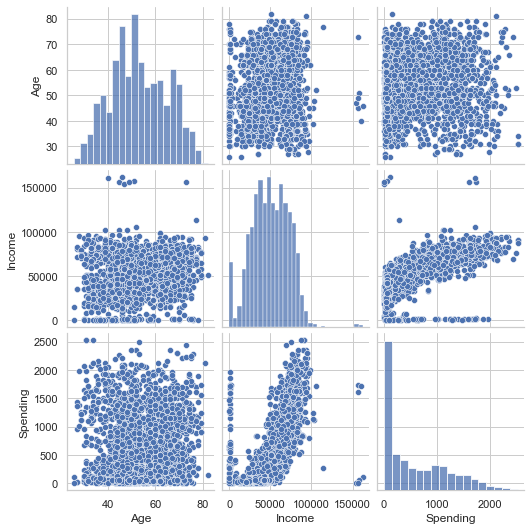

In [303]:
sns.pairplot(df)

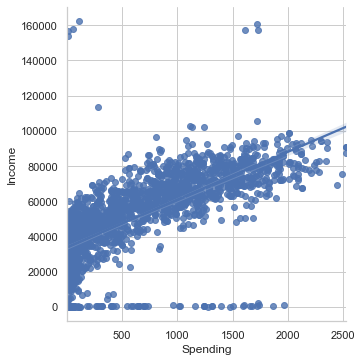

In [304]:
sns.lmplot(data=df, x='Spending', y='Income')

In [305]:
# Spending is positively correlated with the income level.
# Is the correlation between the spending and the income statistically significant?

In [306]:
table = pd.pivot_table(df,index=['Education'],values=['Income'], aggfunc=np.mean)
round(table,2)

,Income
Education,
2n Cycle,46630.13
Basic,19737.93
Graduation,50380.07
Master,51582.49
PhD,54461.66


<AxesSubplot:xlabel='Education'>

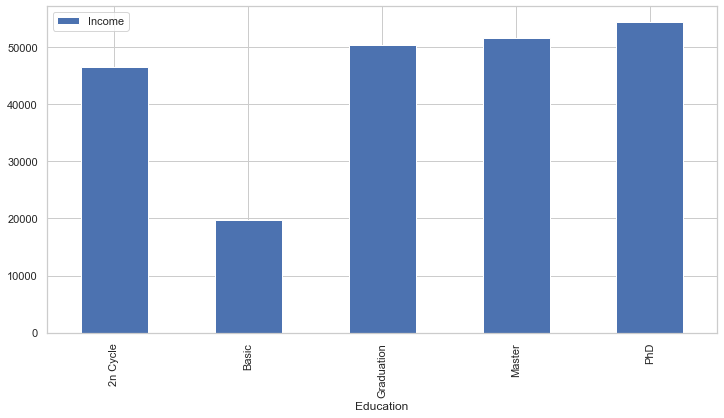

In [307]:
table.plot(kind='bar')

In [308]:
# PhD owners have the highest avg income of $54461.66. Basic diploma owners have the lowest avg income of $19737.93.
# Is the avg income of PhD owners statistically different from Master owner's one?

<AxesSubplot:title={'center':'Income'}, xlabel='Has_children'>

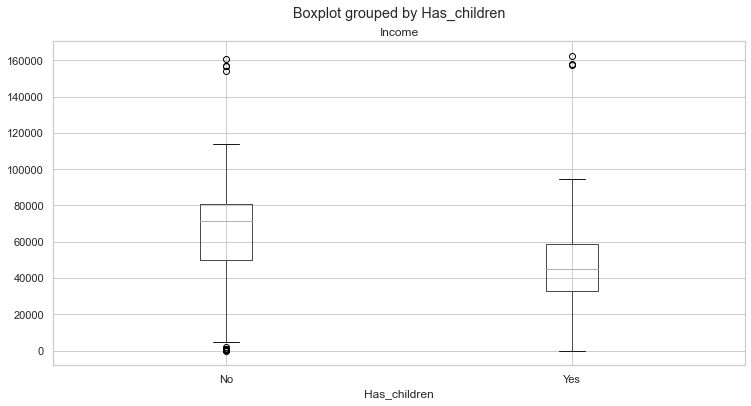

In [309]:
df.boxplot(by ='Has_children', column =['Income'])

In [311]:
# People with higher income tend to not be having children. Does the fact of having at least 1 child affects your level 
# of income? 
# Is there a correlation between the income and the fact of having children?

<AxesSubplot:ylabel='Education'>

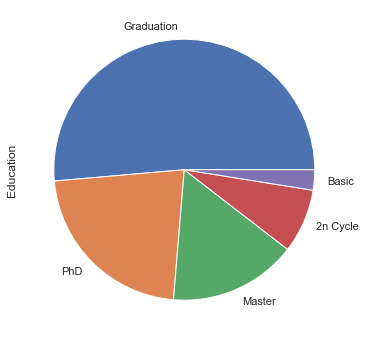

In [312]:
df[df['Marital_Status']=='Alone']['Education'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Education'>

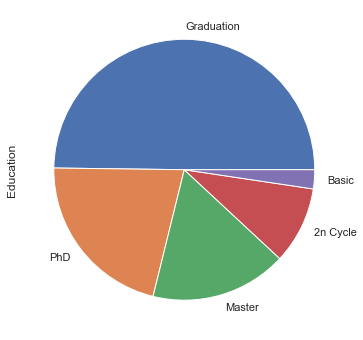

In [313]:
df[df['Marital_Status']=='In couple']['Education'].value_counts().plot(kind='pie')

In [314]:
# The distribution of diploma type might be the same for the 'Alone' category of customers and those who are 'In couple'.
# Is there is a correlation between the diploma type owned and the marital status?

### 4.Hypothesis Testing

**Questions to answer:**
   
1. Is the correlation between the annual income and the amount of spending statistically significant?
2. Is the average income of PhD owners statistically different from Master owners one?
3. Is the average income of customers without kids statistically different from those who have at least 1 child?
4. Is there correlation between the diploma type owned and the marital status?

In [315]:
# H0: the variables 'Age', 'Income', 'Spending' have Gaussian distribution

In [316]:
stats.shapiro(df['Age'])

ShapiroResult(statistic=0.9833491444587708, pvalue=1.6651641774362183e-15)

In [317]:
stats.shapiro(df['Income'])

ShapiroResult(statistic=0.9801547527313232, pvalue=4.177012284847799e-17)

In [318]:
stats.shapiro(df['Spending'])

ShapiroResult(statistic=0.8650392889976501, pvalue=3.2604291629138384e-40)

In [319]:
# All the pvalues < 0.5, meaning we can reject the H0. Our variables are not Gaussian. Which means we will 
# use nonparametric statistical methods to test our hypotheses

#### Numerical variables : Spearman Rank Correlation test

H0 : There is no significant correlation between income and spending amount

In [320]:
stats.spearmanr(df[['Spending']], df[['Income']])

SpearmanrResult(correlation=0.796579766002999, pvalue=0.0)

In [321]:
# The corr coef is 0.7966 indicates a quite strong positive correlation. The pvalue < 0.05, we reject H0

#### Numerical variables : Mann-Whitney's test

H0 : The mean ranks of the PhD Owner's Income and Master Owner's Income are equal

In [322]:
stats.shapiro(df[df['Education']=='PhD']['Income'])

ShapiroResult(statistic=0.9513535499572754, pvalue=1.5273612236077483e-11)

In [323]:
stats.shapiro(df[df['Education']=='Master']['Income'])

ShapiroResult(statistic=0.9822080731391907, pvalue=0.000158140086568892)

In [324]:
# pvalues < 0.05 , we reject the H0 hypothesis (samples are not Gaussian)

In [325]:
print(f"PhD: median = {df[df['Education']=='PhD']['Income'].median()}, stdv = {df[df['Education']=='PhD']['Income'].std()}")
print(f"Master: median = {df[df['Education']=='Master']['Income'].median()}, stdv = {df[df['Education']=='Master']['Income'].std()}")

PhD: median = 54237.0, stdv = 22061.013716803627
Master: median = 50132.5, stdv = 21485.696668003846


In [326]:
stats.mannwhitneyu(df[df['Education']=='PhD']['Income'], df[df['Education']=='Master']['Income'])

MannwhitneyuResult(statistic=82840.0, pvalue=0.0271634412657259)

In [327]:
# pvalue <0.05, we reject H0, meaning the means are statistically different. We can conclude that the average income 
# of PhD owners is different from the average income of Master owners at a 95% confidence level

H0 : The mean ranks of the Income of customers without kids and customers with at least 1 child  are equal

In [328]:
print(f"PhD: median = {df[df['Has_children']=='No']['Income'].median()}, stdv = {df[df['Has_children']=='No']['Income'].std()}")
print(f"Master: median = {df[df['Has_children']=='Yes']['Income'].median()}, stdv = {df[df['Has_children']=='Yes']['Income'].std()}")

PhD: median = 71604.0, stdv = 26189.577377340196
Master: median = 45204.0, stdv = 19155.641039876795


In [329]:
stats.mannwhitneyu(df[df['Has_children']=='No']['Income'], df[df['Has_children']=='Yes']['Income'])

MannwhitneyuResult(statistic=263222.0, pvalue=1.2798234951388841e-71)

In [330]:
# pvalue <0.05, we reject H0, meaning the means are statistically different. We can conclude that the average income 
# of customers without kuds is different from the average income of those with at least 1 child

#### Categorical variables : Chi-square test for independance

H0 : Education and Marital_Status are independent

In [331]:
crosstab = pd.crosstab(df['Education'], df['Marital_Status'])
crosstab

Marital_Status,Alone,In couple
Education,,
2n Cycle,63,138
Basic,20,34
Graduation,408,718
Master,126,244
PhD,177,308


In [332]:
stat, p, dof, expected  = stats.chi2_contingency(crosstab)
stat, p, dof, expected

(2.384803975937097,
 0.6653751599991342,
 4,
 array([[ 71.37477639, 129.62522361],
        [ 19.17531306,  34.82468694],
        [399.84078712, 726.15921288],
        [131.38640429, 238.61359571],
        [172.22271914, 312.77728086]]))

In [333]:
stats.chi2.ppf(0.95, dof)

9.487729036781154

In [334]:
# pvalue < 0.05, we reject H0 hypothesis, meaning the marital status is independent from the diploma type 
# owned at a 95% confidence level

In [361]:
data['Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data['Campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['Response']

In [362]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Spending,Has_children,Purchases,Campaigns
0,1826,1970,Graduation,Alone,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,52,1190,No,15,1
1,1,1961,Graduation,Alone,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,61,577,No,18,2
2,10476,1958,Graduation,In couple,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,64,251,Yes,11,0
3,1386,1967,Graduation,In couple,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,55,11,Yes,4,0
4,5371,1989,Graduation,Alone,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,33,91,Yes,8,2


In [366]:
df2 = data[['Education','Marital_Status','Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
       'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Country','Age','Spending','Has_children','Purchases','Campaigns']]
df2.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country,Age,Spending,Has_children,Purchases,Campaigns
0,Graduation,Alone,84835.0,189,104,379,111,189,218,1,4,4,6,1,SP,52,1190,No,15,1
1,Graduation,Alone,57091.0,464,5,64,7,0,37,1,7,3,7,5,CA,61,577,No,18,2
2,Graduation,In couple,67267.0,134,11,59,15,2,30,1,3,2,5,2,US,64,251,Yes,11,0
3,Graduation,In couple,32474.0,10,0,1,0,0,0,1,1,0,2,7,AUS,55,11,Yes,4,0
4,Graduation,Alone,21474.0,6,16,24,11,0,34,2,3,1,2,7,SP,33,91,Yes,8,2


<AxesSubplot:>

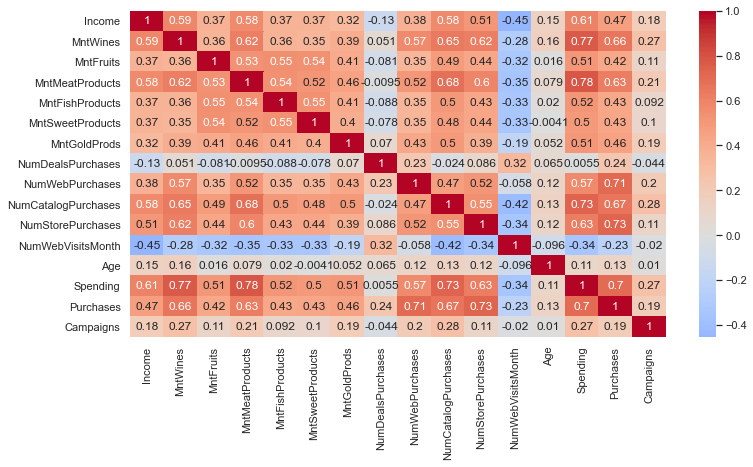

In [370]:
plt.rcParams["figure.figsize"] = (12,6)
sns.heatmap(df2.corr(method = 'kendall'),annot=True,cmap='coolwarm',center = 0)

In [341]:
# It might seem strange but NumWebVisitsMonth is negatively correlated with Number/WebPurchases, but instead it is 
# positively correlated with the NumDealsPurchases. Do Deals is a factor that stimulates buying via Web?

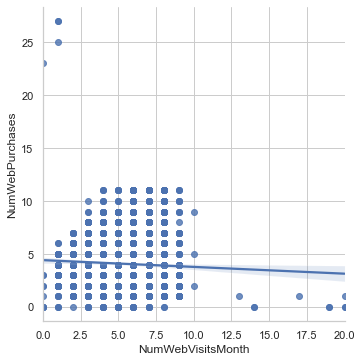

In [371]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df2)

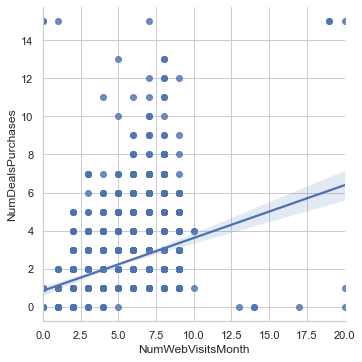

In [372]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df2)

**Questions to answer:**

5. Is the correlation between 'NumWebVisitsMonth' and 'NumDealsPurchases' statistically significant?

In [373]:
def graph2(feature):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,4)
    sns.histplot(data=df2, x=feature, kde=True, ax=ax[0])
    sns.boxplot(data=df2, x=feature, ax=ax[1])
    plt.show()

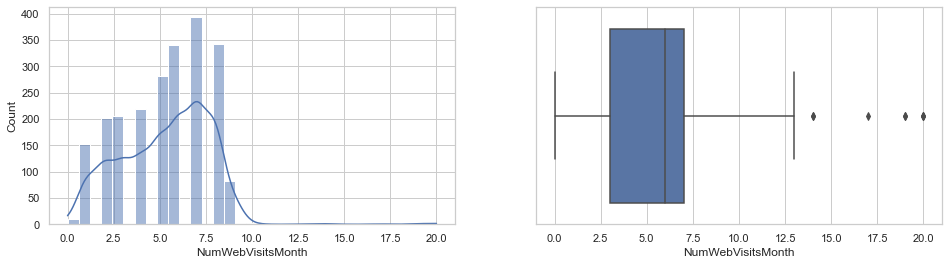

In [374]:
graph2(df2['NumWebVisitsMonth'])

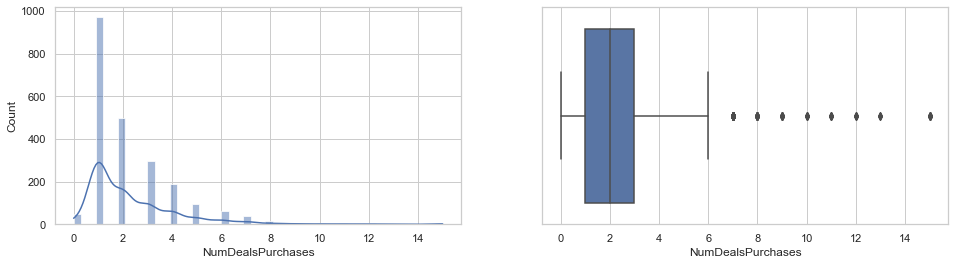

In [375]:
graph2(df2['NumDealsPurchases'])

In [376]:
stats.shapiro(df2['NumWebVisitsMonth'])

ShapiroResult(statistic=0.9299021363258362, pvalue=3.5205691403878756e-31)

In [377]:
stats.shapiro(df2['NumDealsPurchases'])

ShapiroResult(statistic=0.7398102283477783, pvalue=0.0)

In [352]:
# both pvalues < 0.05, we reject H0 hypothesis. Both variables are not Gaussian. We'll be using nonparametric 
# statistical methods to test our hypotheses

H0 : There is no significant correlation between 'NumWebVisitsMonth' and 'NumDealsPurchases'

In [378]:
stats.spearmanr(df2[['NumWebVisitsMonth']], df2[['NumDealsPurchases']])

SpearmanrResult(correlation=0.3978491817177954, pvalue=7.700547143365324e-86)

In [355]:
# The pvalue < 0.05, we reject H0. The correlation between these two variables is significant